# Estudo sobre NLP e introdução a análise de sentimento utilizando um modelo supervisionado

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importando os dados
reviews = pd.read_csv("Data/imdb-reviews-pt-br.csv")

#Vendo o texto 
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
#Vendo a quantidade de dados
print("Linhas: {}\nColunas: {}".format(reviews.shape[0], reviews.shape[1]))

Linhas: 49459
Colunas: 4


In [4]:
#Vendo os tipos de dados 
reviews.dtypes

id            int64
text_en      object
text_pt      object
sentiment    object
dtype: object

In [5]:
#Vendo se há valores nulos dentro do dataset 
reviews.isnull().sum()

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

# Fazendo o NPL antes de mandar para o modelo de classificação

In [6]:
#Deixando o label como 0 e 1 
label = reviews['sentiment'].replace(['neg','pos'],[0,1])

#Criando a nova coluna
reviews['label'] = label

#Vendo o df 
reviews.head()

,id,text_en,text_pt,sentiment,label
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [7]:
#Vamos utilizar a técnica de vectorização para passar os valores para o algoritmo mais pra frente 

#Importando as bibliotecas 
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
#Criando um exemplpo 
exemplo = ["Assisti um filme ótimo","Assisti um filme ruim"]

#Pegando o vectorizer
vetorizar = CountVectorizer(lowercase=False)

#Fazendo o fit com nosso exemplo 
bag_of_words = vetorizar.fit_transform(exemplo)

In [9]:
#Mostrando nossos features names
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [10]:
#Mostrando a matrix de palavras 
matriz_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [11]:
#Vendo a matriz
matriz_sparse

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [16]:
#Agora fazer a vetorização com o nosso dataset 
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(reviews['text_pt'])

#Pritando o tamanho do bag of words 
print(bag_of_words.shape)

(49459, 50)


In [17]:
#Agora com os tokens nós iremos separar os dados de teste e de treino para o treinamento do modelo 

#Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
#Separando os dados de teste e de treino com os tokens vetorizados 
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, reviews['label'], random_state=42)

#Pegando o modelo 
model = LogisticRegression()

#Treinando o modelo 
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
#Printando a acurácia do modelo 
acuracia = model.score(X_test, y_test)
print("Acurácia do modelo: {:.2f}".format(acuracia))

Acurácia do modelo: 0.66


In [24]:
#Criando a função para a classificação do texto para uso futuro 
def classific_text(dataframe, coluna, coluna_classificacao):
    #Vetorização
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(dataframe[coluna])

    #Separando os dados de teste e de treino com os tokens vetorizados 
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, dataframe[coluna_classificacao], random_state=42)

    #Pegando o modelo 
    model = LogisticRegression()

    #Treinando o modelo 
    model.fit(X_train, y_train)

    #Pegando a acurácia do modelo 
    acuracia = model.score(X_test, y_test)

    return print("Acurácia do modelo: {:.2f}".format(acuracia))

In [25]:
#Testando a função 
classific_text(reviews, 'text_pt','label')

Acurácia do modelo: 0.66


In [28]:
#Fazendo a wordcloud para melhorar a visualização 
from wordcloud import WordCloud

In [39]:
#Separando o texto cru do dataframe 
todas_palavras = ' '.join([texto for texto in reviews['text_pt']])

#Criando o wordcloud
word_cloud = WordCloud(max_font_size=110, collocations=False).generate(todas_palavras)

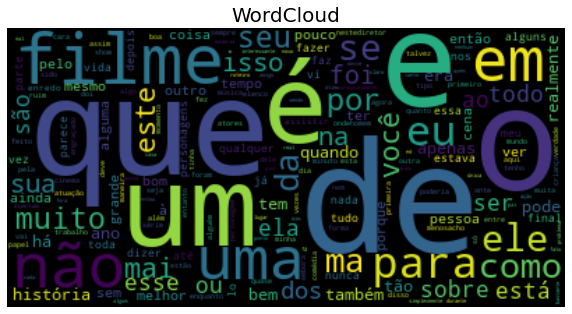

In [40]:
#Plotando o world cloud
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud", fontsize=20)
plt.show()

In [41]:
#Mesmo que consigamos ver a wordcloud com todas as opiniões do filme 
#Vamos visualizar quais são as palavras mais ditas quando a opinião do filme é negativa e positiva 

In [62]:
#Criando a função para criar a wordcloud com base nos sentimentos da análise
def cloud(data,sentimento):
    
    #Separando os dados de acordo com o sentimento
    data_sentimento = data.query("sentiment == @sentimento")

    #Separando o texto cru do dataframe 
    todas_palavras = ' '.join([texto for texto in data_sentimento['text_pt']])

    #Criando o wordcloud
    word_cloud = WordCloud(width=800, height=500 ,max_font_size=110, collocations=False).generate(todas_palavras)

    #Plotando o world cloud
    plt.figure(figsize=(10,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud", fontsize=20)
    plt.show()

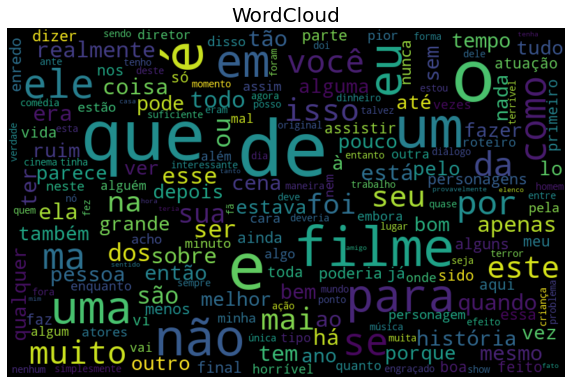

In [63]:
#Vendo palavras das análises negativas
cloud(reviews, 'neg')

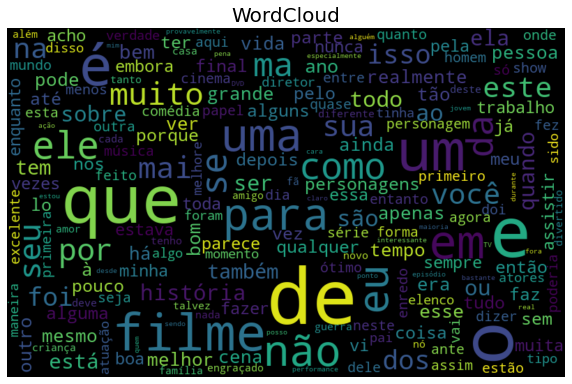

In [64]:
#Vendo palavras das análises negativas
cloud(reviews, 'pos')

In [65]:
#Utilizando a biblioteca NLTK para aprimorar a  tokenização e visualização das palavras

In [85]:
#Importando a bibliotefca
import nltk

In [70]:
#Usando uma frase de exemplo 
frase = 'Foi o pior filme que eu já vi na minha vida!'

#PPegando o token 
token = tokenize.WhitespaceTokenizer()

#Utilizando na frase
token_frase = token.tokenize(frase)

#Vendo o resultado 
token_frase

['Foi', 'o', 'pior', 'filme', 'que', 'eu', 'já', 'vi', 'na', 'minha', 'vida!']

In [72]:
#Testando a tokenização com o dataframe inteiro 
token_data = token.tokenize(todas_palavras)

#Calcular a frequÊncia das palavras
freq_words = nltk.FreqDist(token_data)

#Vendo a frequência
freq_words

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [77]:
#Criando um dataframe para melhorar a visualização 
data_freq = pd.DataFrame({"Words":list(freq_words.keys()), 'Freq':list(freq_words.values())})

#Vendo o dataframe
data_freq.head()

,Words,Freq
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [78]:
#Vendo no gráfico as palavras mais ditas
#Vamos utilizar a biblioteca seaborn 
import seaborn as sns

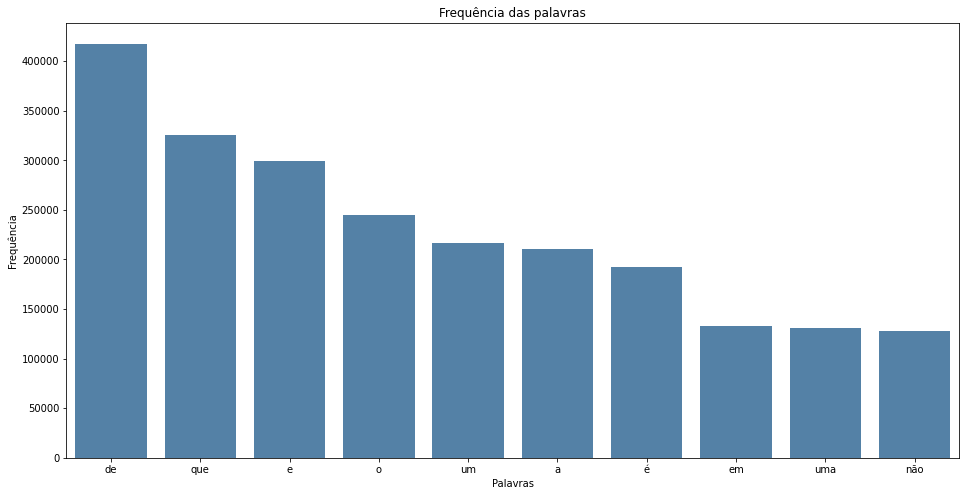

In [81]:
#Criando o gráfico 
plt.figure(figsize=(16,8))
ax = sns.barplot(data = data_freq.sort_values(ascending=False,by='Freq').head(10), x='Words', y='Freq', color='steelblue')
ax.set_ylabel("Frequência")
ax.set_xlabel("Palavras")
ax.set_title("Frequência das palavras")
plt.show()

In [82]:
#Criando a função do gráfico para uso posterior
def plot_bar_freq(texto, coluna_texto):
    
    #Separando o texto cru do dataframe 
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    
    #Testando a tokenização com o dataframe inteiro 
    token_data = token.tokenize(todas_palavras)

    #Calcular a frequÊncia das palavras
    freq_words = nltk.FreqDist(token_data) 

    #Criando um dataframe para melhorar a visualização 
    data_freq = pd.DataFrame({"Words":list(freq_words.keys()), 'Freq':list(freq_words.values())})       
    
    #Criando o gráfico 
    plt.figure(figsize=(16,8))
    ax = sns.barplot(data = data_freq.sort_values(ascending=False,by='Freq').head(10), x='Words', y='Freq', color='steelblue')
    ax.set_ylabel("Frequência")
    ax.set_xlabel("Palavras")
    ax.set_title("Frequência das palavras")
    plt.show()

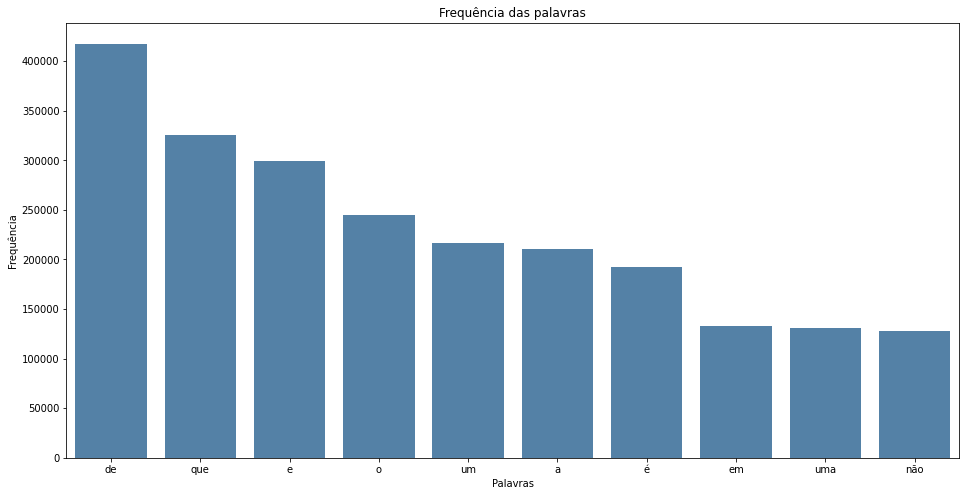

In [86]:
#Testando a função do gráfico 
plot_bar_freq(reviews, 'text_pt')

In [91]:
#Deletando as stopwords dentro do dataset
#Pegando as stopword dentro de pt-br
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [95]:
#Vendo stopwords
stop_words[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [97]:
#Fazendo o tratamento para retirar as stopwords dentro do texto

frase_tratamento = []

#Fazendo o loop para tokenizar as frases e retirar as stopwords
for review in reviews['text_pt']:
    nova_frase = []
    palavra_texto = token.tokenize(review)
    for word in palavra_texto:
        if word not in stop_words:
            nova_frase.append(word)

    frase_tratamento.append(" ".join(nova_frase))

In [98]:
#Juntando a frase tratada com o dt 
reviews['tratamento_1'] = frase_tratamento

#Vendo os dados 
reviews.head()

,id,text_en,text_pt,sentiment,label,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


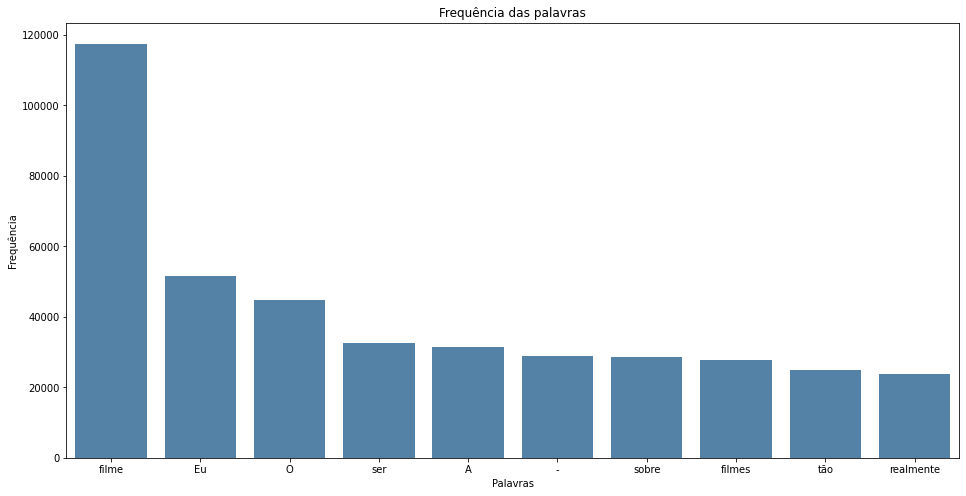

In [99]:
#Usando a função com as frases tratadas
plot_bar_freq(reviews, 'tratamento_1')

In [ ]:
#Vendo a wordcloud
